# libraries

In [2]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score 

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

# 1

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

# 2

In [8]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)

# ezafii:)))outcome ra bar asas 2 feature neshan midahad

In [ ]:
p=sns.pairplot(df, hue = 'Outcome')

# 3

In [21]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

# 4

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Outcome'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# 5 KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [ ]:
## max train score
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

In [ ]:
## max test score
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

 ezafii:))))

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#knn with k neighbors
knn = KNeighborsClassifier(10)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

pca

In [ ]:
train = []
test = []
index = []

std_slc = StandardScaler()
#df_std = std_slc.fit_transform(df)

for i in range(1,9):
    index.append(i)

    x_train_std = std_slc.fit_transform(x_train)
    pca_std_train= PCA(i)
    projected_std_train = pca_std_train.fit_transform(x_train_std)
 #for x_test we dont need fit_transform*
    x_test_std = std_slc.transform(x_test)
    pca_std_test = PCA(i)
    projected_std_test = pca_std_test.fit_transform(x_test_std)

   # labels_train = (x_train,y_train)
    knn = KNeighborsClassifier(n_neighbors=100).fit(projected_std_train,y_train)
    
    train.append(accuracy_score(y_train, knn.predict(projected_std_train)))
    test.append(accuracy_score(y_test, knn.predict(projected_std_test)))

print(train)
print(test)
plt.plot(index,train)
plt.plot(index, test)

# ezafi:)))))Decision boundary

In [ ]:
value = 20000
width = 20000
plot_decision_regions(x.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight =x_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.show()

# 6 k-fold

In [30]:
from sklearn.model_selection import KFold

k_range = range(1, 21)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  cv = KFold(n_splits=5, random_state=1, shuffle=True)
  scores = cross_val_score(knn, x, y , cv = cv, scoring= 'accuracy')
  k_scores.append(scores.mean())
 

In [ ]:
 k_scores

In [ ]:
max(k_scores)

0.7617095322977676

In [17]:
a=k_scores.index(max(k_scores))
a

14

In [ ]:
k_scores[a]

0.7617095322977676

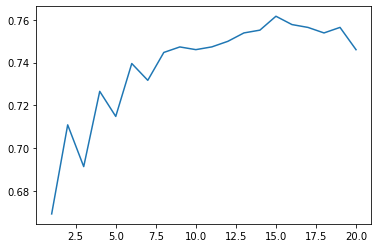

In [32]:
sns.lineplot(x = k_range, y = k_scores);

# 7KNN model with best k nighbor

In [ ]:
X = df.drop(['Outcome'], axis = 1)
X.shape
y = df['Outcome']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
X_test.shape
knn = KNeighborsClassifier(n_neighbors= 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

# confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0           78  29  107
1           30  17   47
All        108  46  154

Text(0.5, 15.0, 'Predicted label')

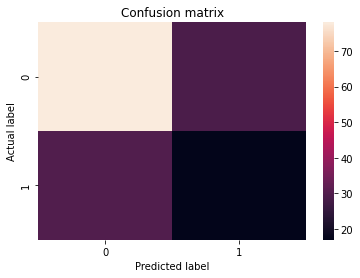

In [ ]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix))
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


recall /precision

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       107
           1       0.37      0.36      0.37        47

    accuracy                           0.62       154
   macro avg       0.55      0.55      0.55       154
weighted avg       0.61      0.62      0.62       154

